<a href="https://colab.research.google.com/github/zx878/AI/blob/main/4_keras_CNN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# 引入必要的套件
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
model=Sequential()# 建立模型
model.add(Conv2D(filters=16, kernel_size=(5, 5), input_shape=(28, 28, 1), activation='relu'))# 增加卷積層，使用 relu
model.add(MaxPooling2D(pool_size=(2, 2))) # 增加池化層，使用最大池化
#model.add(Conv2D(filters=36, kernel_size=(5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())# 拉平層
model.add(Dense(10, activation='softmax')) # 增加全連接層，使用 softmax
model.summary() # 列印模型的摘要
# 編譯模型
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])# 設定優化器rmsprop、損失函數categorical_crossentropy和評估指標accuracy

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                23050     
                                                                 
Total params: 23,466
Trainable params: 23,466
Non-trainable params: 0
_________________________________________________________________


In [4]:
# 載入 MNIST 資料集
mnist=keras.datasets.mnist
(train_data, train_label), (test_data, test_label) = mnist.load_data()
test_label_original=test_label #for crosstab
train_label = keras.utils.to_categorical(train_label)
test_label = keras.utils.to_categorical(test_label)

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
# 使用訓練集進行模型訓練，設定訓練的參數
train_history=model.fit(train_data,train_label,epochs=10,batch_size=512)
#train_data是訓練集的輸入資料 train_label 是訓練集的標籤，epochs 設定訓練的回合數10，batch_size 設定每一個批次的樣本數512

Epoch 1/10
118/118 [==============================] - 5s 5ms/step - loss: 5.9991 - accuracy: 0.7922
Epoch 2/10
118/118 [==============================] - 0s 4ms/step - loss: 0.5149 - accuracy: 0.9408
Epoch 3/10
118/118 [==============================] - 0s 4ms/step - loss: 0.1697 - accuracy: 0.9678
Epoch 4/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0925 - accuracy: 0.9777
Epoch 5/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0621 - accuracy: 0.9839
Epoch 6/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0482 - accuracy: 0.9866
Epoch 7/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0359 - accuracy: 0.9894
Epoch 8/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0294 - accuracy: 0.9912
Epoch 9/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0240 - accuracy: 0.9927
Epoch 10/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0202 - accuracy: 0.9938

In [6]:
# 使用測試集對模型進行評估，並輸出測試集的準確率
score=model.evaluate(test_data, test_label)
print(score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1264 - accuracy: 0.9771
0.9771000146865845


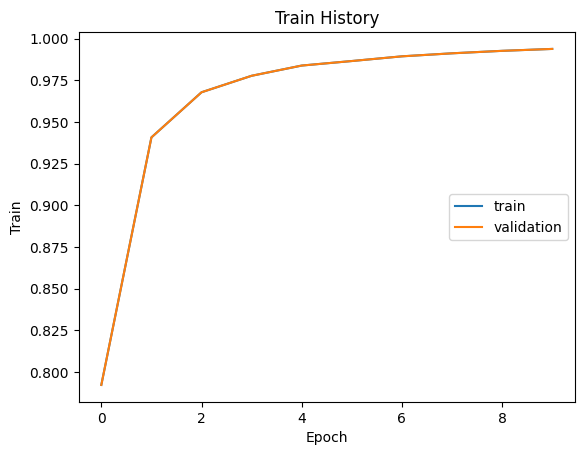

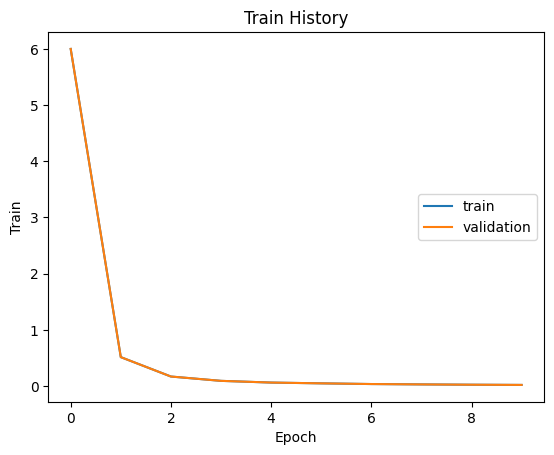

313/313 [==============================] - 1s 2ms/step
(10000, 10)


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,962,0,4,0,0,0,3,1,8,2
1,0,1120,3,3,1,0,1,0,7,0
2,1,1,1014,1,3,0,2,3,7,0
3,0,1,0,1002,0,2,0,0,5,0
4,1,0,2,1,963,0,1,1,3,10
5,4,0,0,16,0,861,1,0,6,4
6,7,4,1,0,3,2,935,0,6,0
7,0,5,11,11,1,0,0,979,8,13
8,3,0,3,1,0,1,1,0,963,2


In [7]:
#繪製正確性與損失立歷史圖
import matplotlib.pyplot as plt
import numpy as np

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('Train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()

show_train_history(train_history, 'accuracy', 'accuracy')
show_train_history(train_history, 'loss', 'loss')

# Confusion Matrix混淆矩陣
import pandas as pd
prediction = model.predict(test_data)
prediction_label=np.argmax(prediction,axis=1)
print(test_label.shape)
pd.crosstab(test_label_original, prediction_label, rownames=['label'], colnames=['predict'])